In [4]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [5]:
dx = pd.read_csv(r'/home/nkem/Documents/PhD_Research/allN11Oct2022.csv')
dx['incidentdate'] = pd.to_datetime(dx['incidentdate'])
td = dx.copy()

In [6]:
dk = td.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedqty'].agg(['sum','size'])
dk = dk.reset_index()
dk.rename(columns={"sum":"estimatedqty", "size":"spillno"}, inplace=True)

In [7]:
dk.head()

,incidentdate,estimatedqty,spillno
0,2005-01-31,100.0570,3
1,2005-02-28,0.0300,1
2,2005-03-31,3.0600,2
3,2005-04-30,40.6459,32
4,2005-05-31,59.0000,2


In [6]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Grid Search Naive Methods for Univariate Time Series Forecasting

In [7]:
# grid search persistence models for airline passengers
from math import sqrt
from numpy import mean
from pandas import read_csv
from sklearn.metrics import mean_squared_error

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# root mean squared error or rmse
#def measure_rmse(actual, predicted):
	#return sqrt(mean_squared_error(actual, predicted))

# root mean squared error or rmse
def measure_mae(actual, predicted):
	return(mean_absolute_error(actual, predicted))

# fit a model
def model_fit(train, config):
	return None

# forecast with a pre-fit model
def model_predict(model, history, offset):
	return history[-offset]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# fit model
	model = model_fit(train, cfg)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_mae(test, predictions)
	print(' > %.3f' % error)
	return error

# score a model, return None on failure
def repeat_evaluate(data, config, n_test, n_repeats=10):
	# convert config to a key
	key = str(config)
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	# summarize score
	result = mean(scores)
	print('> Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test):
	# evaluate configs
	scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# define dataset
#series = read_csv('monthly-airline-passengers.csv', header=0, index_col=0)
series = dk["spillno"]
data = series.values
# data split
n_test = 3
# model configs
cfg_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 10 configs
for cfg, error in scores[:10]:
	print(cfg, error)

 > 32.333
 > 32.333
 > 32.333
 > 32.333
 > 32.333
 > 32.333
 > 32.333
 > 32.333
 > 32.333
 > 32.333
> Model[1] 32.333
 > 29.000
 > 29.000
 > 29.000
 > 29.000
 > 29.000
 > 29.000
 > 29.000
 > 29.000
 > 29.000
 > 29.000
> Model[2] 29.000
 > 21.667
 > 21.667
 > 21.667
 > 21.667
 > 21.667
 > 21.667
 > 21.667
 > 21.667
 > 21.667
 > 21.667
> Model[3] 21.667
 > 34.000
 > 34.000
 > 34.000
 > 34.000
 > 34.000
 > 34.000
 > 34.000
 > 34.000
 > 34.000
 > 34.000
> Model[4] 34.000
 > 27.000
 > 27.000
 > 27.000
 > 27.000
 > 27.000
 > 27.000
 > 27.000
 > 27.000
 > 27.000
 > 27.000
> Model[5] 27.000
 > 21.000
 > 21.000
 > 21.000
 > 21.000
 > 21.000
 > 21.000
 > 21.000
 > 21.000
 > 21.000
 > 21.000
> Model[6] 21.000
 > 19.000
 > 19.000
 > 19.000
 > 19.000
 > 19.000
 > 19.000
 > 19.000
 > 19.000
 > 19.000
 > 19.000
> Model[7] 19.000
 > 26.333
 > 26.333
 > 26.333
 > 26.333
 > 26.333
 > 26.333
 > 26.333
 > 26.333
 > 26.333
 > 26.333
> Model[8] 26.333
 > 22.667
 > 22.667
 > 22.667
 > 22.667
 > 22.667
 > 22.

In [9]:
# grid search mlps for airline passengers
from math import sqrt
from numpy import array
from numpy import mean
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values

# root mean squared error or rmse
def measure_mae(actual, predicted):
	return (mean_absolute_error(actual, predicted))

# difference dataset
def difference(data, order):
	return [data[i] - data[i - order] for i in range(order, len(data))]

# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_nodes, n_epochs, n_batch, n_diff = config
	# prepare data
	if n_diff > 0:
		train = difference(train, n_diff)
	# transform series into supervised format
	data = series_to_supervised(train, n_in=n_input)
	# separate inputs and outputs
	train_x, train_y = data[:, :-1], data[:, -1]
	# define model
	model = Sequential()
	model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit model
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

# forecast with the fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, n_diff = config
	# prepare data
	correction = 0.0
	if n_diff > 0:
		correction = history[-n_diff]
		history = difference(history, n_diff)
	# shape input for model
	x_input = array(history[-n_input:]).reshape((1, n_input))
	# make forecast
	yhat = model.predict(x_input, verbose=0)
	# correct forecast if it was differenced
	return correction + yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# fit model
	model = model_fit(train, cfg)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_mae(test, predictions)
	print(' > %.3f' % error)
	return error

# score a model, return None on failure
def repeat_evaluate(data, config, n_test, n_repeats=10):
	# convert config to a key
	key = str(config)
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	# summarize score
	result = mean(scores)
	print('> Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test):
	# evaluate configs
	scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a list of configs to try
def model_configs():
	# define scope of configs
	n_input = [12]
	n_nodes = [50, 100]
	n_epochs = [100]
	n_batch = [1, 150]
	n_diff = [0, 12]
	# create configs
	configs = list()
	for i in n_input:
		for j in n_nodes:
			for k in n_epochs:
				for l in n_batch:
					for m in n_diff:
						cfg = [i, j, k, l, m]
						configs.append(cfg)
	print('Total configs: %d' % len(configs))
	return configs

# define dataset
#series = read_csv('monthly-airline-passengers.csv', header=0, index_col=0)
series = dk["spillno"]
data = series.values
# data split
n_test = 12
# model configs
cfg_list = model_configs()
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
	print(cfg, error)

Total configs: 8
 > 13.953
 > 15.966
 > 15.471
 > 15.594
 > 14.594
 > 14.693
 > 15.447
 > 13.655
 > 13.111
 > 15.775
> Model[[12, 50, 100, 1, 0]] 14.826
 > 12.143
 > 13.780
 > 12.723
 > 13.718
 > 14.768
 > 13.084
 > 11.801
 > 12.782
 > 12.281
 > 10.763
> Model[[12, 50, 100, 1, 12]] 12.784
 > 12.708
 > 13.047
 > 13.888
 > 13.620
 > 14.450
 > 13.683
 > 13.587
 > 13.742
 > 12.074
 > 14.090
> Model[[12, 50, 100, 150, 0]] 13.489
 > 11.959
 > 10.954
 > 12.380
 > 11.659
 > 12.638
 > 12.089
 > 11.419
 > 12.710
 > 12.898
 > 12.800
> Model[[12, 50, 100, 150, 12]] 12.151
 > 14.513
 > 14.482
 > 16.134
 > 14.076
 > 13.710
 > 17.051
 > 15.138
 > 14.663
 > 15.735
 > 17.726
> Model[[12, 100, 100, 1, 0]] 15.323
 > 14.067
 > 11.875
 > 12.668
 > 13.592
 > 11.553
 > 13.017
 > 11.810
 > 12.282
 > 13.528
 > 12.171
> Model[[12, 100, 100, 1, 12]] 12.656
 > 12.632
 > 12.600
 > 13.678
 > 13.435
 > 13.026
 > 13.404
 > 13.563
 > 12.409
 > 12.918
 > 13.169
> Model[[12, 100, 100, 150, 0]] 13.083
 > 12.369
 > 12.615

In [1]:
! pip install pmdarima

In [8]:
series = dk["spillno"]
data = series.values

In [11]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.298647
p-value: 0.172405


In [13]:
data

array([  3,   1,   2,  32,   2,  11,  10,   9,   7,  14,   6,   9,   9,
        11,   7,   4,  26,  19,  33,  23,  26,  35,  25,  30,  56, 108,
        51,  55, 103,  83,  76,  49,  45,  59,  54,  53,  60,  44,  47,
        56,  60,  67,  70,  74,  56,  44,  43,  47,  51,  40,  55,  41,
        54,  56,  65,  52,  52,  58,  40,  59,  62,  58,  49,  54,  94,
        58,  52,  80,  59,  59,  54,  65,  50,  49,  94,  40,  74,  89,
        82,  95,  87,  89,  97,  86,  82,  74,  64,  72, 108,  99,  89,
        95,  69,  71,  89,  72,  65,  80,  88,  93, 138, 110, 128, 122,
       108, 146, 146, 164, 137, 118, 128, 114, 139,  86, 111, 106,  74,
        61,  85,  63,  46,  66,  61,  76,  72,  64,  48,  52,  53,  54,
        74,  42,  57,  34,  42,  26,  37,  46,  55,  54,  49,  51,  40,
        28,  41,  31,  42,  23,  31,  59,  56,  32,  32,  29,  44,  34,
        40,  37,  48,  46,  53,  54,  63,  50,  47,  42,  58,  39,  53,
        40,  39,  50,  38,  45,  44,  52,  47,  41,  33,  42,  4

In [17]:
dk

,incidentdate,estimatedqty,spillno
0,2005-01-31,100.05700,3
1,2005-02-28,0.03000,1
2,2005-03-31,3.06000,2
3,2005-04-30,40.64590,32
4,2005-05-31,59.00000,2
...,...,...,...
209,2022-06-30,4195.38135,48
210,2022-07-31,6474.50000,20
211,2022-08-31,794.03734,60
212,2022-09-30,640.84910,38


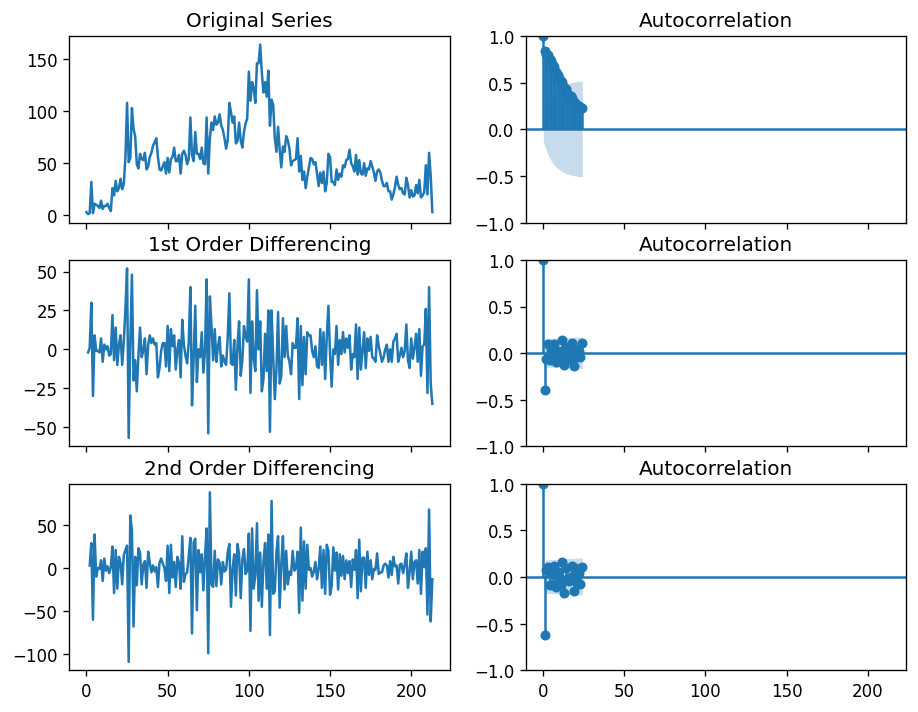

In [20]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = dk["spillno"]

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.662629
p-value: 0.000000


In [24]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1759.522, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1807.331, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1772.708, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1757.536, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1805.331, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1759.517, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1759.864, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1755.569, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1757.554, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1757.549, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1770.713, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1757.902, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.620 seconds
                               SARIMAX Results                                
Dep. Vari

In [2]:
import pandas as pd
dx = pd.read_csv(r'/home/nkem/Documents/PhD_Research/allN11Oct2022.csv')
dx['incidentdate'] = pd.to_datetime(dx['incidentdate'])
td = dx.copy()

In [3]:
dk = td.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedqty'].agg(['sum','size'])
dk = dk.reset_index()
dk.rename(columns={"sum":"estimatedqty", "size":"spillno"}, inplace=True)

In [4]:
dk.to_csv(r"/home/nkem/Documents/PhD_Research/grpbym.csv")

In [5]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mae = mean_absolute_error(test, predictions)
	return mae

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mae = evaluate_arima_model(dataset, order)
					if mae < best_score:
						best_score, best_cfg = mae, order
					print('ARIMA%s MAE=%.3f' % (order,mae))
				except:
					continue
	print('Best ARIMA%s MAE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series = dk["spillno"]
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10]
d_values = range(0, 2)
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

/tmp/ipykernel_210567/25561040.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


ARIMA(0, 0, 0) MAE=22.764
ARIMA(0, 0, 1) MAE=15.771
ARIMA(0, 0, 2) MAE=12.998
ARIMA(0, 0, 3) MAE=12.191
ARIMA(0, 0, 4) MAE=11.204
ARIMA(0, 0, 5) MAE=11.208
ARIMA(0, 1, 0) MAE=9.452
ARIMA(0, 1, 1) MAE=8.143
ARIMA(0, 1, 2) MAE=8.155
ARIMA(0, 1, 3) MAE=8.348
ARIMA(0, 1, 4) MAE=8.511
ARIMA(0, 1, 5) MAE=8.589
ARIMA(1, 0, 0) MAE=9.496
ARIMA(1, 0, 1) MAE=8.266
ARIMA(1, 0, 2) MAE=8.287
ARIMA(1, 0, 3) MAE=8.582
ARIMA(1, 0, 4) MAE=8.676
ARIMA(1, 0, 5) MAE=8.793
ARIMA(1, 1, 0) MAE=8.424
ARIMA(1, 1, 1) MAE=8.149
ARIMA(1, 1, 2) MAE=8.485
ARIMA(1, 1, 3) MAE=8.609
ARIMA(1, 1, 4) MAE=8.714
ARIMA(1, 1, 5) MAE=8.663
ARIMA(2, 0, 0) MAE=8.562
ARIMA(2, 0, 1) MAE=8.279
ARIMA(2, 0, 2) MAE=8.565
ARIMA(2, 0, 3) MAE=8.755
ARIMA(2, 0, 4) MAE=8.978
ARIMA(2, 0, 5) MAE=9.172
ARIMA(2, 1, 0) MAE=8.494
ARIMA(2, 1, 1) MAE=8.402
ARIMA(2, 1, 2) MAE=8.628
ARIMA(2, 1, 3) MAE=8.404
ARIMA(2, 1, 4) MAE=9.149
ARIMA(2, 1, 5) MAE=8.782
ARIMA(3, 0, 0) MAE=8.596
ARIMA(3, 0, 1) MAE=8.580
ARIMA(3, 0, 2) MAE=8.757
ARIMA(3, 0, 3) MAE=

In [ ]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mae = mean_absolute_error(test, predictions)
	return mae

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mae = evaluate_arima_model(dataset, order)
					if mae < best_score:
						best_score, best_cfg = mae, order
					print('ARIMA%s MAE=%.3f' % (order,mae))
				except:
					continue
	print('Best ARIMA%s MAE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series = dk["spillno"]
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10]
d_values = range(0, 2)
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)